# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


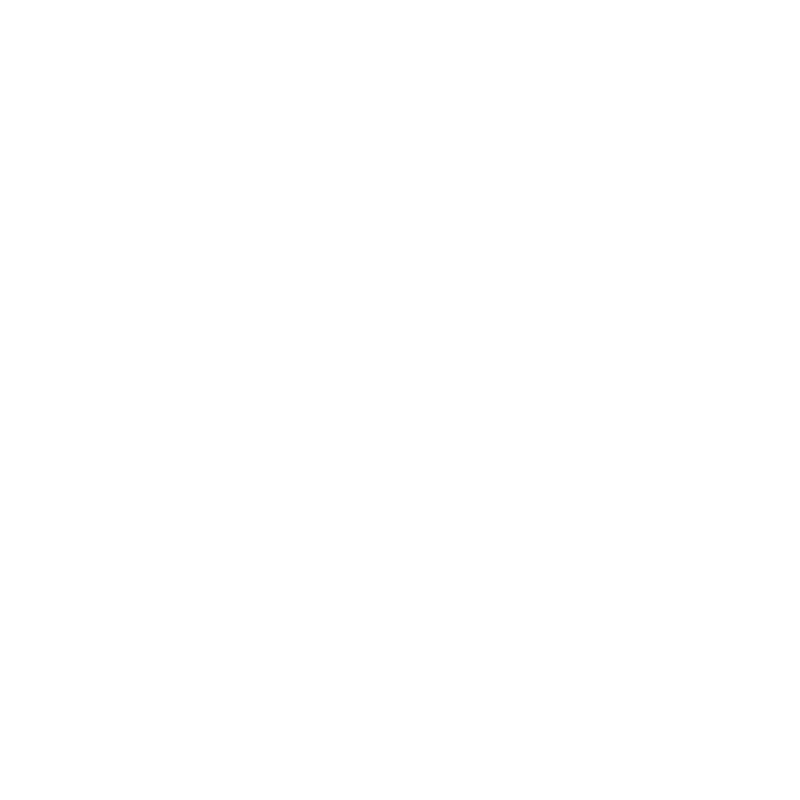

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106

In [4]:
len(df["ID"])

165085

In [5]:
len(df['ID'].unique())

24

In [6]:
df=df.sort('Date')
df.head()
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Month-Day'] != '02-29']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [7]:
tenyears=df[(df['Date']>='2005-01-01')& (df['Date']<'2015-01-01')]
tenyears.head()

ID        Date Element  Data_Value Month-Day
60995  USW00004848  2005-01-01    TMIN           0     01-01
17153  USC00207320  2005-01-01    TMAX         150     01-01
17155  USC00207320  2005-01-01    TMIN         -11     01-01
10079  USW00014833  2005-01-01    TMIN         -44     01-01
10073  USW00014833  2005-01-01    TMAX          33     01-01

In [8]:
print(tenyears['Date'].max())
print(tenyears['Date'].min())


2014-12-31
2005-01-01


In [9]:
df2015=df[df['Date']>='2015-01-01']
df2015.head()

ID        Date Element  Data_Value Month-Day
43095  USW00014833  2015-01-01    TMIN         -88     01-01
51805  USC00208972  2015-01-01    TMAX         -67     01-01
43140  USC00202308  2015-01-01    TMIN        -106     01-01
43653  USC00200228  2015-01-01    TMAX         -50     01-01
43652  USC00200228  2015-01-01    TMIN         -89     01-01

In [10]:
df2015['Date'].max()

'2015-12-31'

In [11]:
tenyears['Date']=pd.to_datetime(tenyears['Date'])

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
tenyears['Date'].head()

60995   2005-01-01
17153   2005-01-01
17155   2005-01-01
10079   2005-01-01
10073   2005-01-01
Name: Date, dtype: datetime64[ns]

In [13]:
tenyears['Month']=pd.DatetimeIndex(tenyears['Date']).month

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
tenyears.head()

ID       Date Element  Data_Value Month-Day  Month
60995  USW00004848 2005-01-01    TMIN           0     01-01      1
17153  USC00207320 2005-01-01    TMAX         150     01-01      1
17155  USC00207320 2005-01-01    TMIN         -11     01-01      1
10079  USW00014833 2005-01-01    TMIN         -44     01-01      1
10073  USW00014833 2005-01-01    TMAX          33     01-01      1

In [15]:
tenyears['Day']=pd.DatetimeIndex(tenyears['Date']).day
tenyears.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ID       Date Element  Data_Value Month-Day  Month  Day
60995  USW00004848 2005-01-01    TMIN           0     01-01      1    1
17153  USC00207320 2005-01-01    TMAX         150     01-01      1    1
17155  USC00207320 2005-01-01    TMIN         -11     01-01      1    1
10079  USW00014833 2005-01-01    TMIN         -44     01-01      1    1
10073  USW00014833 2005-01-01    TMAX          33     01-01      1    1

In [16]:
maxgroup=tenyears.groupby(['Month','Day']).max()

In [17]:
maxgroup

ID       Date Element  Data_Value Month-Day
Month Day                                                      
1     1    USW00094889 2014-01-01    TMIN         156     01-01
      2    USW00094889 2014-01-02    TMIN         139     01-02
      3    USW00094889 2014-01-03    TMIN         133     01-03
      4    USW00094889 2014-01-04    TMIN         106     01-04
      5    USW00094889 2014-01-05    TMIN         128     01-05
      6    USW00094889 2014-01-06    TMIN         189     01-06
      7    USW00094889 2014-01-07    TMIN         217     01-07
      8    USW00094889 2014-01-08    TMIN         194     01-08
      9    USW00094889 2014-01-09    TMIN         178     01-09
      10   USW00094889 2014-01-10    TMIN         100     01-10
      11   USW00094889 2014-01-11    TMIN         156     01-11
      12   USW00094889 2014-01-12    TMIN         161     01-12
      13   USW00094889 2014-01-13    TMIN         167     01-13
      14   USW00094889 2014-01-14    TMIN         150     01-14
      15   USW00094889 2014-01-15    TMIN          67     01-15
      16   USW00094889 2014-01-16    TMIN          94     01-16
      17   USW00094889 2014-01-17    TMIN         133     01-17
      18   USW00094889 2014-01-18    TMIN         122     01-18
      19   USW00094889 2014-01-19    TMIN         106     01-19
      20   USW00094889 2014-01-20    TMIN         133     01-20
      21   USW00094889 2014-01-21    TMIN         133     01-21
      22   USW00094889 2014-01-22    TMIN         117     01-22
      23   USW00094889 2014-01-23    TMIN         128     01-23
      24   USW00094889 2014-01-24    TMIN         117     01-24
      25   USW00094889 2014-01-25    TMIN         100     01-25
      26   USW00094889 2014-01-26    TMIN          89     01-26
      27   USW00094889 2014-01-27    TMIN          78     01-27
      28   USW00094889 2014-01-28    TMIN         122     01-28
      29   USW00094889 2014-01-29    TMIN         178     01-29
      30   USW00094889 2014-01-30    TMIN         183     01-30
...                ...        ...     ...         ...       ...
12    2    USW00094889 2014-12-02    TMIN         156     12-02
      3    USW00094889 2014-12-03    TMIN         183     12-03
      4    USW00094889 2014-12-04    TMIN         183     12-04
      5    USW00094889 2014-12-05    TMIN         172     12-05
      6    USW00094889 2014-12-06    TMIN         128     12-06
      7    USW00094889 2014-12-07    TMIN          83     12-07
      8    USW00094889 2014-12-08    TMIN          72     12-08
      9    USW00094889 2014-12-09    TMIN          83     12-09
      10   USW00094889 2014-12-10    TMIN         111     12-10
      11   USW00094889 2014-12-11    TMIN         128     12-11
      12   USW00094889 2014-12-12    TMIN         133     12-12
      13   USW00094889 2014-12-13    TMIN         111     12-13
      14   USW00094889 2014-12-14    TMIN         139     12-14
      15   USW00094889 2014-12-15    TMIN         150     12-15
      16   USW00094889 2014-12-16    TMIN         139     12-16
      17   USW00094889 2014-12-17    TMIN         144     12-17
      18   USW00094889 2014-12-18    TMIN         156     12-18
      19   USW00094889 2014-12-19    TMIN         122     12-19
      20   USW00094889 2014-12-20    TMIN         133     12-20
      21   USW00094889 2014-12-21    TMIN         156     12-21
      22   USW00094889 2014-12-22    TMIN         133     12-22
      23   USW00094889 2014-12-23    TMIN         133     12-23
      24   USW00094889 2014-12-24    TMIN         139     12-24
      25   USW00094889 2014-12-25    TMIN         100     12-25
      26   USW00094889 2014-12-26    TMIN         106     12-26
      27   USW00094889 2014-12-27    TMIN         189     12-27
      28   USW00094889 2014-12-28    TMIN         194     12-28
      29   USW00094889 2014-12-29    TMIN         128     12-29
      30   USW00094889 2014-12-30    TMIN         117     12-30
      31   USW00094889 2014-12-31    TMIN         13

In [18]:
mingroup=tenyears.groupby(['Month','Day']).min()
mingroup

ID       Date Element  Data_Value Month-Day
Month Day                                                      
1     1    USC00200032 2005-01-01    TMAX        -160     01-01
      2    USC00200032 2005-01-02    TMAX        -267     01-02
      3    USC00200032 2005-01-03    TMAX        -267     01-03
      4    USC00200032 2005-01-04    TMAX        -261     01-04
      5    USC00200032 2005-01-05    TMAX        -150     01-05
      6    USC00200032 2005-01-06    TMAX        -266     01-06
      7    USC00200032 2005-01-07    TMAX        -306     01-07
      8    USC00200032 2005-01-08    TMAX        -294     01-08
      9    USC00200032 2005-01-09    TMAX        -278     01-09
      10   USC00200032 2005-01-10    TMAX        -256     01-10
      11   USC00200032 2005-01-11    TMAX        -183     01-11
      12   USC00200032 2005-01-12    TMAX        -193     01-12
      13   USC00200032 2005-01-13    TMAX        -250     01-13
      14   USC00200032 2005-01-14    TMAX        -266     01-14
      15   USC00200032 2005-01-15    TMAX        -272     01-15
      16   USC00200032 2005-01-16    TMAX        -294     01-16
      17   USC00200032 2005-01-17    TMAX        -294     01-17
      18   USC00200032 2005-01-18    TMAX        -289     01-18
      19   USC00200032 2005-01-19    TMAX        -300     01-19
      20   USC00200032 2005-01-20    TMAX        -239     01-20
      21   USC00200032 2005-01-21    TMAX        -260     01-21
      22   USC00200032 2005-01-22    TMAX        -277     01-22
      23   USC00200032 2005-01-23    TMAX        -250     01-23
      24   USC00200032 2005-01-24    TMAX        -267     01-24
      25   USC00200032 2005-01-25    TMAX        -243     01-25
      26   USC00200032 2005-01-26    TMAX        -238     01-26
      27   USC00200032 2005-01-27    TMAX        -239     01-27
      28   USC00200032 2005-01-28    TMAX        -294     01-28
      29   USC00200032 2005-01-29    TMAX        -278     01-29
      30   USC00200032 2005-01-30    TMAX        -233     01-30
...                ...        ...     ...         ...       ...
12    2    USC00200032 2005-12-02    TMAX        -133     12-02
      3    USC00200032 2005-12-03    TMAX        -100     12-03
      4    USC00200032 2005-12-04    TMAX        -122     12-04
      5    USC00200032 2005-12-05    TMAX        -155     12-05
      6    USC00200032 2005-12-06    TMAX        -183     12-06
      7    USC00200032 2005-12-07    TMAX        -194     12-07
      8    USC00200032 2005-12-08    TMAX        -200     12-08
      9    USC00200032 2005-12-09    TMAX        -189     12-09
      10   USC00200032 2005-12-10    TMAX        -172     12-10
      11   USC00200032 2005-12-11    TMAX        -167     12-11
      12   USC00200032 2005-12-12    TMAX        -210     12-12
      13   USC00200032 2005-12-13    TMAX        -178     12-13
      14   USC00200032 2005-12-14    TMAX        -161     12-14
      15   USC00200032 2005-12-15    TMAX        -166     12-15
      16   USC00200032 2005-12-16    TMAX        -228     12-16
      17   USC00200032 2005-12-17    TMAX        -222     12-17
      18   USC00200032 2005-12-18    TMAX        -194     12-18
      19   USC00200032 2005-12-19    TMAX        -161     12-19
      20   USC00200032 2005-12-20    TMAX        -167     12-20
      21   USC00200032 2005-12-21    TMAX        -194     12-21
      22   USC00200032 2005-12-22    TMAX        -200     12-22
      23   USC00200032 2005-12-23    TMAX        -200     12-23
      24   USC00200032 2005-12-24    TMAX        -167     12-24
      25   USC00200032 2005-12-25    TMAX        -167     12-25
      26   USC00200032 2005-12-26    TMAX        -156     12-26
      27   USC00200032 2005-12-27    TMAX        -138     12-27
      28   USC00200032 2005-12-28    TMAX        -166     12-28
      29   USC00200032 2005-12-29    TMAX        -150     12-29
      30   USC00200032 2005-12-30    TMAX        -144     12-30
      31   USC00200032 2005-12-31    TMAX        -15

In [19]:
maxgroup=maxgroup.reset_index()
maxgroup


Month  Day           ID       Date Element  Data_Value Month-Day
0        1    1  USW00094889 2014-01-01    TMIN         156     01-01
1        1    2  USW00094889 2014-01-02    TMIN         139     01-02
2        1    3  USW00094889 2014-01-03    TMIN         133     01-03
3        1    4  USW00094889 2014-01-04    TMIN         106     01-04
4        1    5  USW00094889 2014-01-05    TMIN         128     01-05
5        1    6  USW00094889 2014-01-06    TMIN         189     01-06
6        1    7  USW00094889 2014-01-07    TMIN         217     01-07
7        1    8  USW00094889 2014-01-08    TMIN         194     01-08
8        1    9  USW00094889 2014-01-09    TMIN         178     01-09
9        1   10  USW00094889 2014-01-10    TMIN         100     01-10
10       1   11  USW00094889 2014-01-11    TMIN         156     01-11
11       1   12  USW00094889 2014-01-12    TMIN         161     01-12
12       1   13  USW00094889 2014-01-13    TMIN         167     01-13
13       1   14  USW00094889 2014-01-14    TMIN         150     01-14
14       1   15  USW00094889 2014-01-15    TMIN          67     01-15
15       1   16  USW00094889 2014-01-16    TMIN          94     01-16
16       1   17  USW00094889 2014-01-17    TMIN         133     01-17
17       1   18  USW00094889 2014-01-18    TMIN         122     01-18
18       1   19  USW00094889 2014-01-19    TMIN         106     01-19
19       1   20  USW00094889 2014-01-20    TMIN         133     01-20
20       1   21  USW00094889 2014-01-21    TMIN         133     01-21
21       1   22  USW00094889 2014-01-22    TMIN         117     01-22
22       1   23  USW00094889 2014-01-23    TMIN         128     01-23
23       1   24  USW00094889 2014-01-24    TMIN         117     01-24
24       1   25  USW00094889 2014-01-25    TMIN         100     01-25
25       1   26  USW00094889 2014-01-26    TMIN          89     01-26
26       1   27  USW00094889 2014-01-27    TMIN          78     01-27
27       1   28  USW00094889 2014-01-28    TMIN         122     01-28
28       1   29  USW00094889 2014-01-29    TMIN         178     01-29
29       1   30  USW00094889 2014-01-30    TMIN         183     01-30
..     ...  ...          ...        ...     ...         ...       ...
335     12    2  USW00094889 2014-12-02    TMIN         156     12-02
336     12    3  USW00094889 2014-12-03    TMIN         183     12-03
337     12    4  USW00094889 2014-12-04    TMIN         183     12-04
338     12    5  USW00094889 2014-12-05    TMIN         172     12-05
339     12    6  USW00094889 2014-12-06    TMIN         128     12-06
340     12    7  USW00094889 2014-12-07    TMIN          83     12-07
341     12    8  USW00094889 2014-12-08    TMIN          72     12-08
342     12    9  USW00094889 2014-12-09    TMIN          83     12-09
343     12   10  USW00094889 2014-12-10    TMIN         111     12-10
344     12   11  USW00094889 2014-12-11    TMIN         128     12-11
345     12   12  USW00094889 2014-12-12    TMIN         133     12-12
346     12   13  USW00094889 2014-12-13    TMIN         111     12-13
347     12   14  USW00094889 2014-12-14    TMIN         139     12-14
348     12   15  USW00094889 2014-12-15    TMIN         150     12-15
349     12   16  USW00094889 2014-12-16    TMIN         139     12-16
350     12   17  USW00094889 2014-12-17    TMIN         144     12-17
351     12   18  USW00094889 2014-12-18    TMIN         156     12-18
352     12   19  USW00094889 2014-12-19    TMIN         122     12-19
353     12   20  USW00094889 2014-12-20    TMIN         133     12-20
354     12   21  USW00094889 2014-12-21    TMIN         156     12-21
355     12   22  USW00094889 2014-12-22    TMIN         133     12-22
356     12   23  USW00094889 2014-12-23    TMIN         133     12-23
357     12   24  USW00094889 2014-12-24    TMIN         139     12-24
358     12   25  USW00094889 2014-12-25    TMIN         100     12-25
359     12   26  USW00094889 2014-12-26    TMIN         106     12-26
360     12   27

In [20]:
mingroup=mingroup.reset_index()
mingroup

Month  Day           ID       Date Element  Data_Value Month-Day
0        1    1  USC00200032 2005-01-01    TMAX        -160     01-01
1        1    2  USC00200032 2005-01-02    TMAX        -267     01-02
2        1    3  USC00200032 2005-01-03    TMAX        -267     01-03
3        1    4  USC00200032 2005-01-04    TMAX        -261     01-04
4        1    5  USC00200032 2005-01-05    TMAX        -150     01-05
5        1    6  USC00200032 2005-01-06    TMAX        -266     01-06
6        1    7  USC00200032 2005-01-07    TMAX        -306     01-07
7        1    8  USC00200032 2005-01-08    TMAX        -294     01-08
8        1    9  USC00200032 2005-01-09    TMAX        -278     01-09
9        1   10  USC00200032 2005-01-10    TMAX        -256     01-10
10       1   11  USC00200032 2005-01-11    TMAX        -183     01-11
11       1   12  USC00200032 2005-01-12    TMAX        -193     01-12
12       1   13  USC00200032 2005-01-13    TMAX        -250     01-13
13       1   14  USC00200032 2005-01-14    TMAX        -266     01-14
14       1   15  USC00200032 2005-01-15    TMAX        -272     01-15
15       1   16  USC00200032 2005-01-16    TMAX        -294     01-16
16       1   17  USC00200032 2005-01-17    TMAX        -294     01-17
17       1   18  USC00200032 2005-01-18    TMAX        -289     01-18
18       1   19  USC00200032 2005-01-19    TMAX        -300     01-19
19       1   20  USC00200032 2005-01-20    TMAX        -239     01-20
20       1   21  USC00200032 2005-01-21    TMAX        -260     01-21
21       1   22  USC00200032 2005-01-22    TMAX        -277     01-22
22       1   23  USC00200032 2005-01-23    TMAX        -250     01-23
23       1   24  USC00200032 2005-01-24    TMAX        -267     01-24
24       1   25  USC00200032 2005-01-25    TMAX        -243     01-25
25       1   26  USC00200032 2005-01-26    TMAX        -238     01-26
26       1   27  USC00200032 2005-01-27    TMAX        -239     01-27
27       1   28  USC00200032 2005-01-28    TMAX        -294     01-28
28       1   29  USC00200032 2005-01-29    TMAX        -278     01-29
29       1   30  USC00200032 2005-01-30    TMAX        -233     01-30
..     ...  ...          ...        ...     ...         ...       ...
335     12    2  USC00200032 2005-12-02    TMAX        -133     12-02
336     12    3  USC00200032 2005-12-03    TMAX        -100     12-03
337     12    4  USC00200032 2005-12-04    TMAX        -122     12-04
338     12    5  USC00200032 2005-12-05    TMAX        -155     12-05
339     12    6  USC00200032 2005-12-06    TMAX        -183     12-06
340     12    7  USC00200032 2005-12-07    TMAX        -194     12-07
341     12    8  USC00200032 2005-12-08    TMAX        -200     12-08
342     12    9  USC00200032 2005-12-09    TMAX        -189     12-09
343     12   10  USC00200032 2005-12-10    TMAX        -172     12-10
344     12   11  USC00200032 2005-12-11    TMAX        -167     12-11
345     12   12  USC00200032 2005-12-12    TMAX        -210     12-12
346     12   13  USC00200032 2005-12-13    TMAX        -178     12-13
347     12   14  USC00200032 2005-12-14    TMAX        -161     12-14
348     12   15  USC00200032 2005-12-15    TMAX        -166     12-15
349     12   16  USC00200032 2005-12-16    TMAX        -228     12-16
350     12   17  USC00200032 2005-12-17    TMAX        -222     12-17
351     12   18  USC00200032 2005-12-18    TMAX        -194     12-18
352     12   19  USC00200032 2005-12-19    TMAX        -161     12-19
353     12   20  USC00200032 2005-12-20    TMAX        -167     12-20
354     12   21  USC00200032 2005-12-21    TMAX        -194     12-21
355     12   22  USC00200032 2005-12-22    TMAX        -200     12-22
356     12   23  USC00200032 2005-12-23    TMAX        -200     12-23
357     12   24  USC00200032 2005-12-24    TMAX        -167     12-24
358     12   25  USC00200032 2005-12-25    TMAX        -167     12-25
359     12   26  USC00200032 2005-12-26    TMAX        -156     12-26
360     12   27

In [21]:
df2015['Date']=pd.to_datetime(df2015['Date'])
df2015max=df2015.groupby('Date').max()
df2015min=df2015.groupby('Date').min()


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
df2015max=df2015max.reset_index()
df2015min=df2015min.reset_index()

In [23]:
highrecord=df2015max[df2015max['Data_Value']>maxgroup['Data_Value']]
lowrecord=df2015min[df2015min['Data_Value']<mingroup['Data_Value']]
lowrecord

Date           ID Element  Data_Value Month-Day
4   2015-01-05  USC00200032    TMAX        -155     01-05
10  2015-01-11  USC00200032    TMAX        -200     01-11
33  2015-02-03  USC00200032    TMAX        -238     02-03
44  2015-02-14  USC00200032    TMAX        -239     02-14
45  2015-02-15  USC00200032    TMAX        -260     02-15
46  2015-02-16  USC00200032    TMAX        -294     02-16
47  2015-02-17  USC00200032    TMAX        -272     02-17
49  2015-02-19  USC00200032    TMAX        -260     02-19
50  2015-02-20  USC00200032    TMAX        -343     02-20
51  2015-02-21  USC00200032    TMAX        -322     02-21
53  2015-02-23  USC00200032    TMAX        -267     02-23
54  2015-02-24  USC00200032    TMAX        -272     02-24
55  2015-02-25  USC00200032    TMAX        -217     02-25
56  2015-02-26  USC00200032    TMAX        -216     02-26
57  2015-02-27  USC00200032    TMAX        -288     02-27
58  2015-02-28  USC00200032    TMAX        -272     02-28
63  2015-03-05  USC00200032    TMAX        -221     03-05
64  2015-03-06  USC00200032    TMAX        -255     03-06
65  2015-03-07  USC00200032    TMAX        -222     03-07
86  2015-03-28  USC00200032    TMAX        -122     03-28
87  2015-03-29  USC00200032    TMAX        -111     03-29
88  2015-03-30  USC00200032    TMAX        -122     03-30
113 2015-04-24  USC00200032    TMAX         -71     04-24
114 2015-04-25  USC00200032    TMAX         -50     04-25
139 2015-05-20  USC00200032    TMAX           0     05-20
183 2015-07-03  USC00200032    TMAX          72     07-03
239 2015-08-28  USC00200032    TMAX          56     08-28
289 2015-10-17  USC00200032    TMAX         -55     10-17
290 2015-10-18  USC00200032    TMAX         -55     10-18
291 2015-10-19  USC00200032    TMAX         -61     10-19
292 2015-10-20  USC00200032    TMAX         -39     10-20
313 2015-11-10  USC00200032    TMAX         -44     11-10

<IPython.core.display.Javascript object>


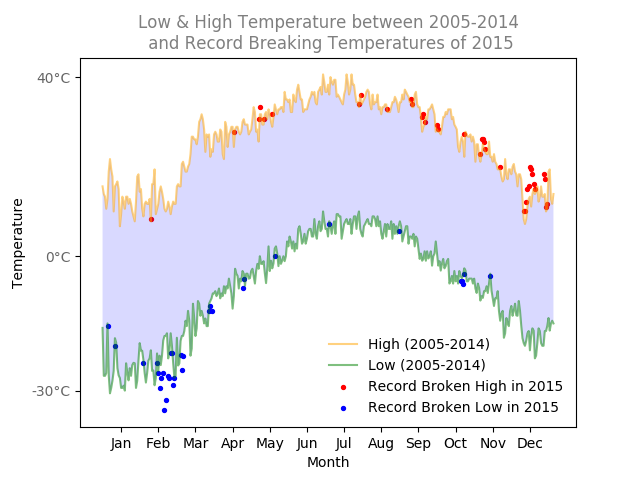

In [39]:
%matplotlib notebook
plt.figure()
plt.scatter(highrecord.index.tolist(),highrecord['Data_Value'],color='r',s=8,label='Record Broken High in 2015')
plt.scatter(lowrecord.index,lowrecord['Data_Value'],color='blue',s=8, label='Record Broken Low in 2015')
plt.plot(maxgroup.index.tolist(),maxgroup['Data_Value'],c='orange',label='High (2005-2014)',alpha=0.5)
plt.plot(mingroup.index.tolist(),mingroup['Data_Value'],c='green',label='Low (2005-2014)',alpha=0.5)
plt.gca().fill_between(mingroup.index,
                       mingroup['Data_Value'],maxgroup['Data_Value'],facecolor='blue',alpha=0.15)
plt.xlabel('Month')
ax=plt.gca()
yticks=pd.Series([-300,0,400])
ax.set_yticks(yticks)
ylabels=pd.Series(yticks/10).astype(int).astype(str)+'°C'
ax.set_yticklabels(ylabels,alpha=0.6)

plt.ylabel('Temperature')
plt.title('Low & High Temperature between 2005-2014\n and Record Breaking Temperatures of 2015',alpha=0.5)
a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)
plt.legend(loc=4,frameon=False)